# Create ResNet50 Model

In [24]:
# Transfer learning on already trained ResNet50. Compile process.

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam

categories = 3

TRAIN_DIR = 'Data_Train/'
TEST_DIR = 'Data_Test/'
TARGETS = ["glaucoma", "normal", "other"]

model = ResNet50(include_top = False, weights = 'imagenet',input_shape=(256,256,3), classifier_activation='softmax',pooling='max')

# The fully connected top layer of ResNet50 is not to added in this model
flattened = Flatten()(model.output)
# All inputs and outputs are connected to neurons (Dense Layers)
# ReLu activation can be used here. Difference --?
fc1 = Dense(3, activation='softmax', name="AddedDense2")(flattened)

full_model = Model(inputs=model.input, outputs=fc1)
full_model.layers[0].trainable = False

In [25]:
adam = Adam(learning_rate=0.001)

In [26]:
full_model.compile(adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
full_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [28]:
train_data = image_dataset_from_directory(
    TRAIN_DIR,
    batch_size=8,
    image_size=(256, 256),
    label_mode="categorical",
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset="training",
)

validate_data = image_dataset_from_directory(
    TRAIN_DIR,
    batch_size=8,
    image_size=(256, 256),
    label_mode="categorical",
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset="validation",
)

test_data = image_dataset_from_directory(
    TEST_DIR,
    batch_size=8,
    image_size=(256, 256),
    label_mode="categorical",
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
)

Found 8718 files belonging to 3 classes.
Using 6975 files for training.
Found 8718 files belonging to 3 classes.
Using 1743 files for validation.
Found 2184 files belonging to 3 classes.


In [29]:
checkpoint_filepath = 'Model/resnet50_best.h5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model_fitting = full_model.fit_generator(
        train_data,
        epochs = 20,
        validation_data=validate_data,
        callbacks=[checkpoint]
)

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
872/872 [==============================] - 327s 368ms/step - loss: 2.4260 - accuracy: 0.7029 - val_loss: 1.2899 - val_accuracy: 0.5399
Epoch 2/20
872/872 [==============================] - 298s 341ms/step - loss: 0.8249 - accuracy: 0.8095 - val_loss: 0.4967 - val_accuracy: 0.7831
Epoch 3/20
872/872 [==============================] - 298s 341ms/step - loss: 0.7997 - accuracy: 0.8120 - val_loss: 3.8539 - val_accuracy: 0.5324
Epoch 4/20
872/872 [==============================] - 296s 339ms/step - loss: 0.7285 - accuracy: 0.7963 - val_loss: 5.2376 - val_accuracy: 0.4940
Epoch 5/20
872/872 [==============================] - 298s 341ms/step - loss: 0.4985 - accuracy: 0.8360 - val_loss: 2.2318 - val_accuracy: 0.7183
Epoch 6/20
872/872 [==============================] - 297s 341ms/step - loss: 0.4546 - accuracy: 0.8670 - val_loss: 0.7414 - val_accuracy: 0.7774
Epoch 7/20
872/872 [==============================] - 298s 342ms/step - loss: 0.3178 - accuracy: 0.8892 - val_loss: 3.3059 -

In [8]:
full_model.save('model_20ep.h5')

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
from shutil import copyfile
copyfile('model_20ep.h5', '../muteluh-fundus/model.h5')

'../muteluh-fundus/model.h5'

NameError: name 'test_data' is not defined

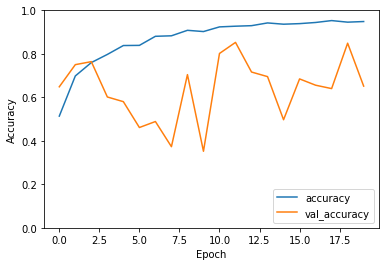

In [16]:
import matplotlib.pyplot as plt

plt.plot(model_fitting.history['accuracy'], label='accuracy')
plt.plot(model_fitting.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('resnet.jpg')

test_loss, test_acc = model.evaluate(test_data, verbose=2)

In [15]:
plt.savefig('resnet.jpg')

<Figure size 432x288 with 0 Axes>

In [11]:
full_model.fit_generator(
        train_data,
        epochs = 10,
        validation_data=validate_data,
        callbacks=[checkpoint]
)

Epoch 1/10
545/545 [==============================] - 315s 576ms/step - loss: 0.2469 - accuracy: 0.9288 - val_loss: 0.3880 - val_accuracy: 0.8316
Epoch 2/10
545/545 [==============================] - 480s 880ms/step - loss: 0.2198 - accuracy: 0.9412 - val_loss: 0.2884 - val_accuracy: 0.9013
Epoch 3/10
545/545 [==============================] - 419s 766ms/step - loss: 0.2158 - accuracy: 0.9321 - val_loss: 3.1126 - val_accuracy: 0.4277
Epoch 4/10
545/545 [==============================] - 342s 627ms/step - loss: 0.1747 - accuracy: 0.9474 - val_loss: 4.0645 - val_accuracy: 0.6994
Epoch 5/10
545/545 [==============================] - 329s 604ms/step - loss: 0.1816 - accuracy: 0.9460 - val_loss: 7.2918 - val_accuracy: 0.3676
Epoch 6/10
545/545 [==============================] - 559s 1s/step - loss: 0.1453 - accuracy: 0.9496 - val_loss: 0.1719 - val_accuracy: 0.9371
Epoch 7/10
545/545 [==============================] - 376s 690ms/step - loss: 0.1699 - accuracy: 0.9475 - val_loss: 0.2278 - va

In [23]:
full_model.save('resnet50_test.h5')

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [25]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.image as mpimg
import tensorflow as tf

img = cv2.imread('Data_Train/class_normal/normal_10_rotated_127.jpg')
class_names = ["glaucoma", "normal", "other"]
model = load_model('resnet50_test.h5')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])
predictions = model.predict(img)
argmax = np.argmax(predictions > 0.5).astype("int32")
score = tf.nn.softmax(predictions[0])
print(argmax)

2


In [22]:
print(predictions)

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    

In [26]:
full_model.fit_generator(train_data,
        epochs = 70,
        validation_data=validate_data,
        callbacks=[checkpoint])

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
436/436 [==============================] - 249s 572ms/step - loss: 0.1742 - accuracy: 0.9627 - val_loss: 0.0969 - val_accuracy: 0.9662
Epoch 2/70
436/436 [==============================] - 251s 576ms/step - loss: 0.1577 - accuracy: 0.9690 - val_loss: 0.1178 - val_accuracy: 0.9644
Epoch 3/70
436/436 [==============================] - 251s 576ms/step - loss: 0.3016 - accuracy: 0.9619 - val_loss: 0.1080 - val_accuracy: 0.9639
Epoch 4/70
436/436 [==============================] - 248s 569ms/step - loss: 0.1637 - accuracy: 0.9730 - val_loss: 0.0801 - val_accuracy: 0.9690
Epoch 5/70
436/436 [==============================] - 248s 568ms/step - loss: 0.1253 - accuracy: 0.9685 - val_loss: 0.1033 - val_accuracy: 0.9662
Epoch 6/70
436/436 [==============================] - 5228s 12s/step - loss: 0.2389 - accuracy: 0.9601 - val_loss: 0.1290 - val_accuracy: 0.9673
Epoch 7/70
436/436 [==============================] - 253s 581ms/step - loss: 0.1889 - accuracy: 0.9670 - val_loss: 0.5507 - 

KeyboardInterrupt: 

In [27]:
full_model.save('resnet50_50ep.h5')

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [28]:
copy('resnet50_50ep.h5','../../muteluh-fundus/resnet50_50ep.h5')

The system cannot find the file specified.


In [29]:
from shutil import copyfile
copyfile('resnet50_50ep.h5', '../../muteluh-fundus/resnet50_50ep.h5')

'../../muteluh-fundus/resnet50_50ep.h5'

In [33]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.image as mpimg
import tensorflow as tf

img = cv2.imread('Data_Train/class_other/other_10_rotated_1.jpg')
class_names = ["glaucoma", "normal", "other"]
model = load_model('resnet50_50ep.h5')

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])
predictions = model.predict(img)
print(predictions)
argmax = np.argmax(predictions)
score = tf.nn.softmax(predictions[0])
print(argmax)

[[0. 0. 1.]]
2


In [12]:
full_model.fit_generator(
        train_data,
        epochs = 10,
        validation_data=validate_data,
        callbacks=[checkpoint]
)

TypeError: fit_generator() got an unexpected keyword argument 'batch_size'